<a href="https://colab.research.google.com/github/bhargav-62/Elevate_Labs_Task_3/blob/main/Elevate_Labs_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fix the UnicodeDecodeError by adding encoding='latin1'
df = pd.read_csv('/content/netflix_titles.csv', encoding='latin1')

# Basic inspection to confirm it works
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


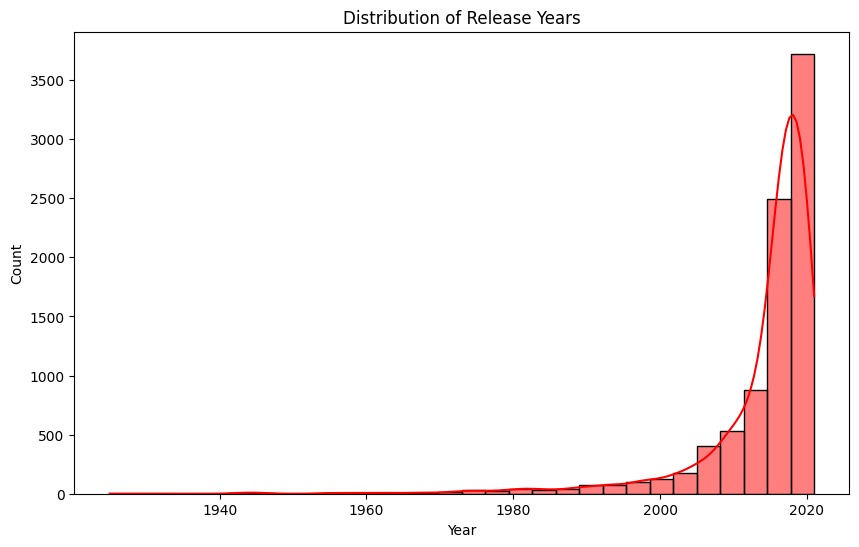

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='red')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# INSIGHT: Netflix library growth exploded after 2015.

/tmp/ipython-input-413229203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


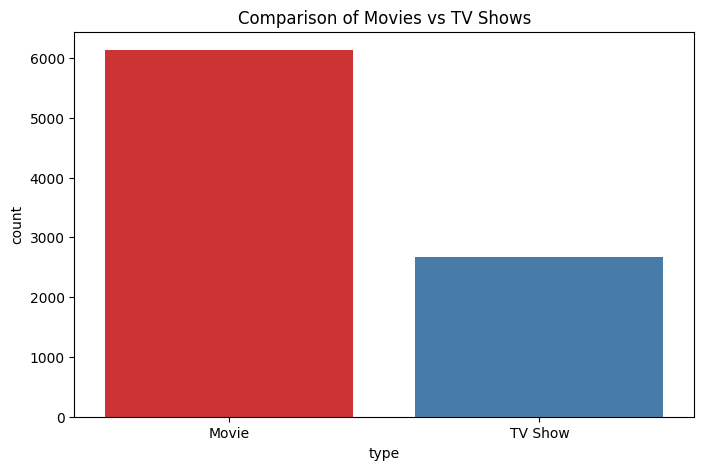

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Comparison of Movies vs TV Shows')
plt.show()

# INSIGHT: There is a much higher volume of Movies compared to TV Shows on the platform.

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2401211743.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)


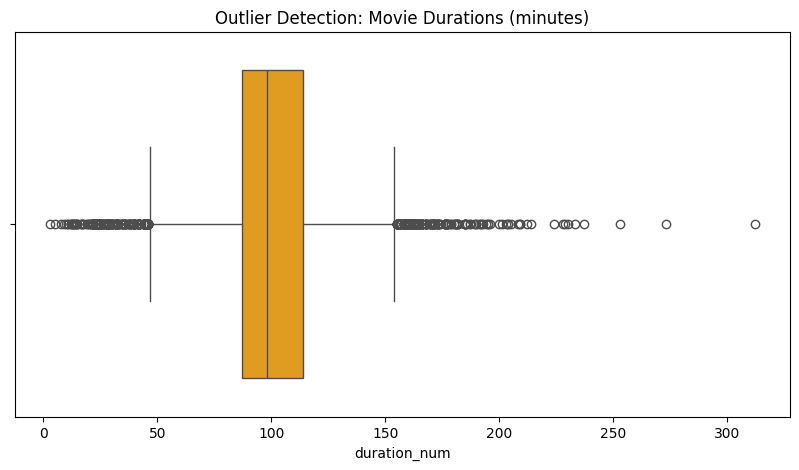

In [7]:
# Filter for Movies and extract numeric minutes
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.boxplot(x=movies_df['duration_num'], color='orange')
plt.title('Outlier Detection: Movie Durations (minutes)')
plt.show()

# INSIGHT: Most movies fall between 80-120 minutes, with several extreme outliers.

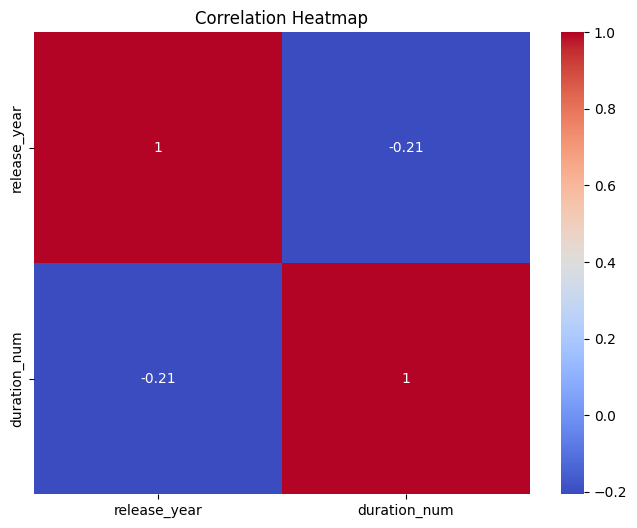

In [8]:
plt.figure(figsize=(8,6))
corr_matrix = movies_df[['release_year', 'duration_num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# INSIGHT: There is almost zero correlation (0.00) between a movie's release year and its length.